### Dimension Reduction Task02

- 뇌암 유전자 발현 데이터 세트를 회귀 분석 하되, 차원을 축소하여 진행해본다.

In [1]:
import pandas as pd 

b_df = pd.read_csv('./datasets/brain_cancer.csv', low_memory = False)
b_df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [2]:
b_df.type.value_counts()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

In [3]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [4]:
# 불필요 feature 삭제
pre_b_df = b_df.drop(labels=['samples'], axis =1)
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [5]:
# label encoder 사용
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_b_df['target'] = encoder.fit_transform(pre_b_df['type'])
pre_b_df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,target
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940,0
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416,0
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827,0
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275,0
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637,4
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351,4
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952,4
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326,4


In [6]:
# 불필요 feature 삭제
pre_b_df = pre_b_df.drop(labels=['type'], axis =1)
pre_b_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,target
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940,0
1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,...,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416,0
2,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827,0
3,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,...,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275,0
4,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,...,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637,4
126,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,...,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351,4
127,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,...,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952,4
128,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,5.140635,...,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326,4


In [7]:
# 결측치 확인
pre_b_df.isna().sum().sum()

0

In [8]:
# 중복값 확인
pre_b_df.duplicated().sum()

0

In [9]:
# target 데이터를 제외한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_b_df.iloc[:, :-1])
std_pre_b_df = pd.DataFrame(result, columns = pre_b_df.iloc[:, :-1].columns)
std_pre_b_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.281734,-1.736304,-0.814542,-0.217100,-0.725018,-1.184185,-1.333998,0.553088,-0.189429,-0.055937,...,-3.937805,-3.063362,-3.368328,-2.732332,0.897836,0.268867,0.790096,0.113594,-0.696548,0.608331
1,1.004990,-1.150107,-0.496988,0.918622,-0.017358,-0.683315,-1.025756,2.343052,-0.683739,0.999013,...,-0.734738,-0.969428,-0.590331,-0.707073,0.083428,0.381955,-0.788721,-0.763316,-1.231041,-0.740878
2,1.005934,-0.292052,0.895202,0.738654,-0.485043,-0.247338,-1.480059,1.073633,2.588411,1.239468,...,-0.356680,-0.455420,-0.091946,-0.458744,0.442703,1.098238,0.535753,-0.591219,-0.402498,0.185009
3,0.228235,0.491046,-1.058556,-1.048181,-0.748240,0.626689,-0.381139,-0.190425,-1.297469,0.736078,...,-0.661774,-0.851095,-0.605492,-0.779546,-1.149432,-0.471656,-0.148096,0.322405,0.752725,-0.585045
4,0.538123,0.046420,3.709860,0.009951,-0.736216,-0.070977,-1.097124,0.599319,-0.736499,-0.429866,...,-1.579314,-1.045122,-0.133185,0.599587,-1.425683,-0.172871,-0.725682,-0.690563,-0.771828,-0.479759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.485107,0.109849,-0.048366,-0.055950,0.711424,1.012222,1.769656,-0.978959,0.952351,-0.929134,...,1.315909,1.401686,1.037736,1.225759,-1.330637,-1.883481,-0.229553,-0.119385,0.617781,-0.358746
126,0.681513,-0.386154,0.974571,-0.091039,-0.952518,-0.397080,0.546147,0.049232,0.097921,-0.744390,...,1.101618,0.958748,0.577300,0.629695,-0.075517,0.460963,-0.919634,-0.203942,0.002770,0.667883
127,0.547059,0.038965,0.048121,-1.358793,1.619374,0.927133,-0.348885,-0.248754,1.583142,-1.005822,...,0.747877,1.017127,1.675996,1.265570,-1.249327,-0.451001,-0.019103,-0.003202,0.854646,1.051999
128,0.518602,-0.709070,-0.478494,-1.086108,1.314546,0.392369,0.910877,-1.125418,0.252094,-0.652057,...,1.227245,1.372272,1.870338,1.870372,-1.523832,-0.329972,-0.809633,1.218691,0.235385,-0.104642


In [10]:
# 이상치 제거
# for column in std_pre_b_df.columns:
#     std_pre_b_df = std_pre_b_df[std_pre_b_df[column].between(-1.96, 1.96)]

# std_pre_b_df

In [11]:
# target 데이터 합치기
std_pre_b_df.loc[:, 'target'] = pre_b_df['target']
std_pre_b_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,target
0,0.281734,-1.736304,-0.814542,-0.217100,-0.725018,-1.184185,-1.333998,0.553088,-0.189429,-0.055937,...,-3.063362,-3.368328,-2.732332,0.897836,0.268867,0.790096,0.113594,-0.696548,0.608331,0
1,1.004990,-1.150107,-0.496988,0.918622,-0.017358,-0.683315,-1.025756,2.343052,-0.683739,0.999013,...,-0.969428,-0.590331,-0.707073,0.083428,0.381955,-0.788721,-0.763316,-1.231041,-0.740878,0
2,1.005934,-0.292052,0.895202,0.738654,-0.485043,-0.247338,-1.480059,1.073633,2.588411,1.239468,...,-0.455420,-0.091946,-0.458744,0.442703,1.098238,0.535753,-0.591219,-0.402498,0.185009,0
3,0.228235,0.491046,-1.058556,-1.048181,-0.748240,0.626689,-0.381139,-0.190425,-1.297469,0.736078,...,-0.851095,-0.605492,-0.779546,-1.149432,-0.471656,-0.148096,0.322405,0.752725,-0.585045,0
4,0.538123,0.046420,3.709860,0.009951,-0.736216,-0.070977,-1.097124,0.599319,-0.736499,-0.429866,...,-1.045122,-0.133185,0.599587,-1.425683,-0.172871,-0.725682,-0.690563,-0.771828,-0.479759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.485107,0.109849,-0.048366,-0.055950,0.711424,1.012222,1.769656,-0.978959,0.952351,-0.929134,...,1.401686,1.037736,1.225759,-1.330637,-1.883481,-0.229553,-0.119385,0.617781,-0.358746,4
126,0.681513,-0.386154,0.974571,-0.091039,-0.952518,-0.397080,0.546147,0.049232,0.097921,-0.744390,...,0.958748,0.577300,0.629695,-0.075517,0.460963,-0.919634,-0.203942,0.002770,0.667883,4
127,0.547059,0.038965,0.048121,-1.358793,1.619374,0.927133,-0.348885,-0.248754,1.583142,-1.005822,...,1.017127,1.675996,1.265570,-1.249327,-0.451001,-0.019103,-0.003202,0.854646,1.051999,4
128,0.518602,-0.709070,-0.478494,-1.086108,1.314546,0.392369,0.910877,-1.125418,0.252094,-0.652057,...,1.372272,1.870338,1.870372,-1.523832,-0.329972,-0.809633,1.218691,0.235385,-0.104642,4


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=321)

l_r = LinearRegression()

pipe = Pipeline([('pca', PCA(n_components=3)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=3)), ('l_r', LinearRegression())])

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [18]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.7819, RMSE: 0.8843, R2: 0.3832


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

# SMOTE 를 적용한 후 훈련

In [20]:
from imblearn.over_sampling import SMOTE

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=321)

smote = SMOTE(random_state=321)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


In [21]:
train_df = pd.concat([X_train_over, y_train_over], axis = 1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis = 1).reset_index(drop=True)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(175, 2) (26, 2)


In [23]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:,'target'] = train_df['target']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:,'target'] = test_df['target']


In [24]:
# 보존률
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.25288593 0.1464052 ]
0.3992911230325129


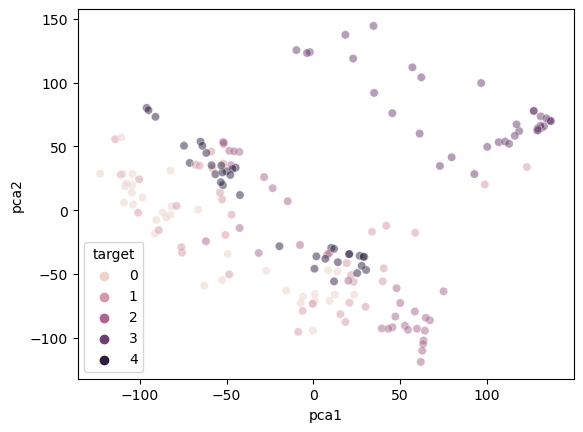

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pca1', y='pca2', hue='target', data=pca_train_df, alpha = 0.5)
plt.show()

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(175, 13) (26, 13)


In [27]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:,'target'] = train_df['target']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:,'target'] = test_df['target']


In [28]:
# 보존률
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.25288593 0.1464052  0.09598441 0.05695091 0.05409747 0.04541334
 0.03939507 0.03794488 0.03574825 0.02974356 0.02632804 0.02289272
 0.01821107]
0.8620008481623571


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn

features, targets = pca_train_df.iloc[:,:-1], pca_train_df.iloc[:, -1]
parameters = {
    'max_depth' : [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfc = RandomForestClassifier()

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')
g_rfc.fit(features, targets)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [30]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
result_df

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.971429,2
1,"{'max_depth': 5, 'min_samples_split': 50}",0.954286,4
2,"{'max_depth': 5, 'min_samples_split': 100}",0.200000,9
3,"{'max_depth': 10, 'min_samples_split': 10}",0.971429,2
4,"{'max_depth': 10, 'min_samples_split': 50}",0.942857,5
5,"{'max_depth': 10, 'min_samples_split': 100}",0.308571,7
6,"{'max_depth': 20, 'min_samples_split': 10}",0.977143,1
7,"{'max_depth': 20, 'min_samples_split': 50}",0.942857,5
8,"{'max_depth': 20, 'min_samples_split': 100}",0.211429,8


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f} '.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [32]:
rfc = RandomForestClassifier(max_depth=20, min_samples_split=50)

In [33]:
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')
g_rfc.fit(features, targets)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20,
                                              min_samples_split=50),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [34]:
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]
# rfc = rfc.best_estimator_
prediction = g_rfc.predict(X_test)

{'ependymoma': 0, 'glioblastoma': 1, 'medulloblastoma': 2, 'normal': 3, 'pilocytic_astrocytoma': 4}
오차 행렬
[[3 0 0 8 0]
 [3 3 0 0 3]
 [0 0 4 0 0]
 [0 0 0 0 0]
 [1 0 0 1 0]]
정확도: 0.3846, 정밀도: 0.4857, 재현율: 0.3212, F1: 0.3667 
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


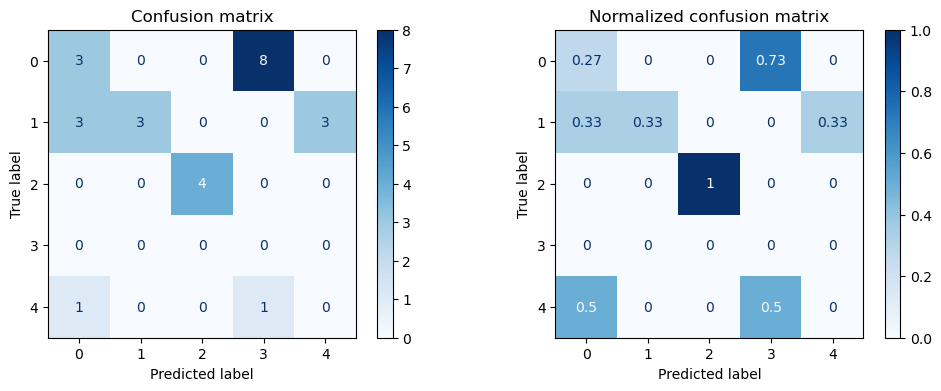

In [35]:
print({class_label: encoding for class_label, encoding in zip(encoder.classes_, range(len(encoder.classes_)))})
get_evaluation(y_test, prediction, g_rfc, X_test)

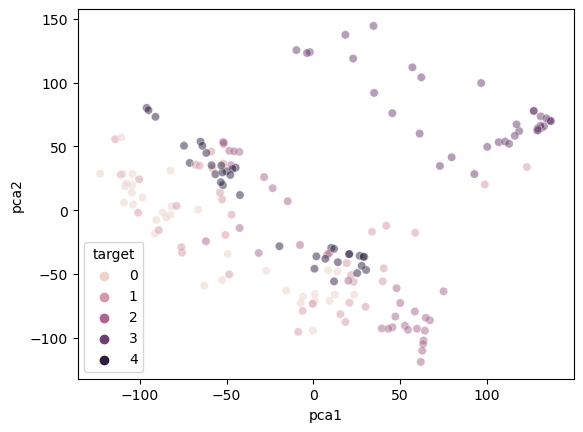

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pca1', y='pca2', hue='target', data=pca_train_df, alpha = 0.5)
plt.show()

# LDA

In [37]:
from imblearn.over_sampling import SMOTE

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=321)

smote = SMOTE(random_state=321)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


In [38]:
train_df = pd.concat([X_train_over, y_train_over], axis = 1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis = 1).reset_index(drop=True)

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)

lda_train = lda.fit_transform(train_df.iloc[: ,:-1], train_df.iloc[:, -1])
lda_test = lda.fit_transform(test_df.iloc[: ,:-1], test_df.iloc[:, -1])

print(lda_train.shape, lda_test.shape)

(175, 2) (26, 2)


In [40]:
lda_columns = [f'lda{i+1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:,'target'] = train_df['target']

lda_columns = [f'lda{i+1}' for i in range(lda_test.shape[1])]
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
lda_test_df.loc[:,'target'] = test_df['target']


In [41]:
# 보존률 (설명률)
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.64386124 0.24884827]
0.8927095035278044


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn

features, targets = lda_train_df.iloc[:,:-1], lda_train_df.iloc[:, -1]
parameters = {
    'max_depth' : [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfc = RandomForestClassifier()

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')
g_rfc.fit(features, targets)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [43]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
result_df

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.891429,2
1,"{'max_depth': 5, 'min_samples_split': 50}",0.891429,2
2,"{'max_depth': 5, 'min_samples_split': 100}",0.200000,8
3,"{'max_depth': 10, 'min_samples_split': 10}",0.897143,1
4,"{'max_depth': 10, 'min_samples_split': 50}",0.885714,4
5,"{'max_depth': 10, 'min_samples_split': 100}",0.200000,8
6,"{'max_depth': 20, 'min_samples_split': 10}",0.885714,4
7,"{'max_depth': 20, 'min_samples_split': 50}",0.885714,4
8,"{'max_depth': 20, 'min_samples_split': 100}",0.228571,7


In [44]:
X_test, y_test = lda_test_df.iloc[:, :-1], lda_test_df.iloc[:, -1]
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

{'ependymoma': 0, 'glioblastoma': 1, 'medulloblastoma': 2, 'normal': 3, 'pilocytic_astrocytoma': 4}
오차 행렬
[[2 8 0 1 0]
 [0 8 1 0 0]
 [0 2 2 0 0]
 [0 0 0 0 0]
 [0 1 0 0 1]]
정확도: 0.5000, 정밀도: 0.6175, 재현율: 0.4141, F1: 0.4234 
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


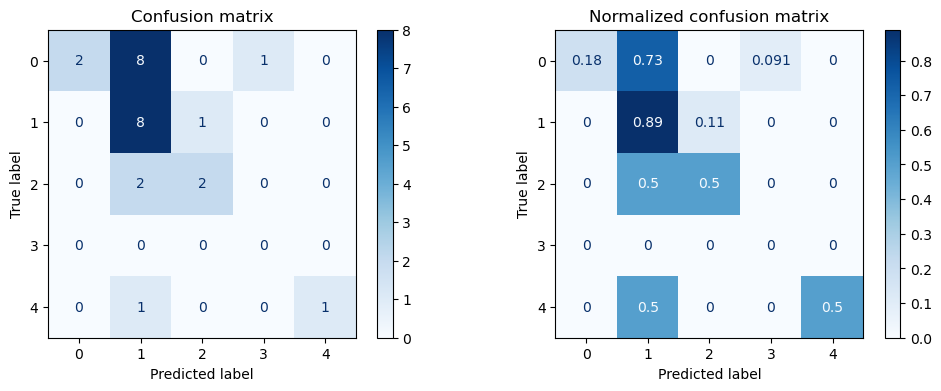

In [45]:
print({class_label: encoding for class_label, encoding in zip(encoder.classes_, range(len(encoder.classes_)))})
get_evaluation(y_test, prediction, rfc, X_test)

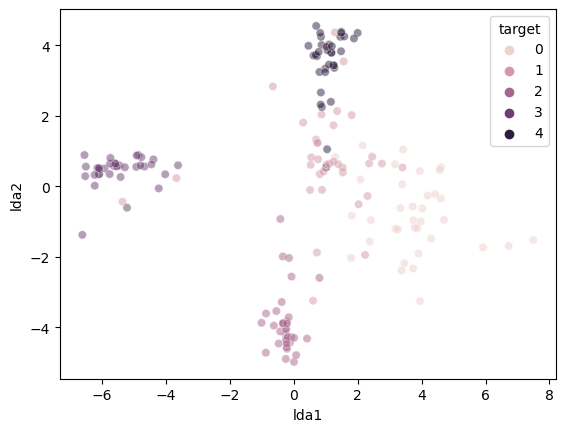

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='lda1', y='lda2', hue='target', data=lda_train_df, alpha = 0.5)
plt.show()